# DECISION TREE


Tasks:

1. Data Preparation:

Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

2. Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, and inconsistencies in the data.
Visualize the distribution of features, including histograms, box plots, and correlation matrices.

3. Feature Engineering:

If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.

4. Decision Tree Classification:

Split the dataset into training and testing sets (e.g., using an 80-20 split).
Implement a Decision Tree Classification model using a library like scikit-learn.

Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

5. Hyperparameter Tuning:

Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.

6. Model Evaluation and Analysis:

Analyse the performance of the Decision Tree model using the evaluation metrics obtained.

Visualize the decision tree structure to understand the rules learned by the model and identify important features

Interview Questions:

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

2. What is the difference between the Label encoding and One-hot encoding?


In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree




In [208]:
df = pd.read_excel('heart_disease.xlsx')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [209]:
cat_cols = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']
for col in cat_cols:
    df[col] = pd.Categorical(df[col]).codes

In [210]:
numeric_cols = df.select_dtypes(include=['number']).columns

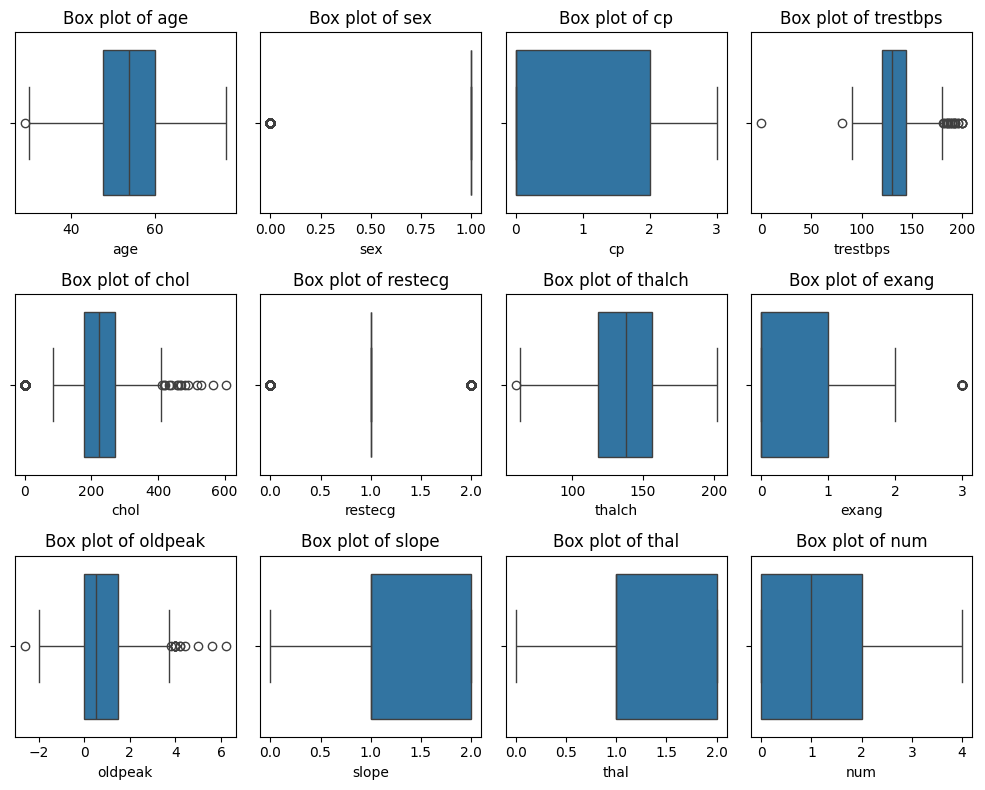

In [211]:
plt.figure(figsize=(10, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

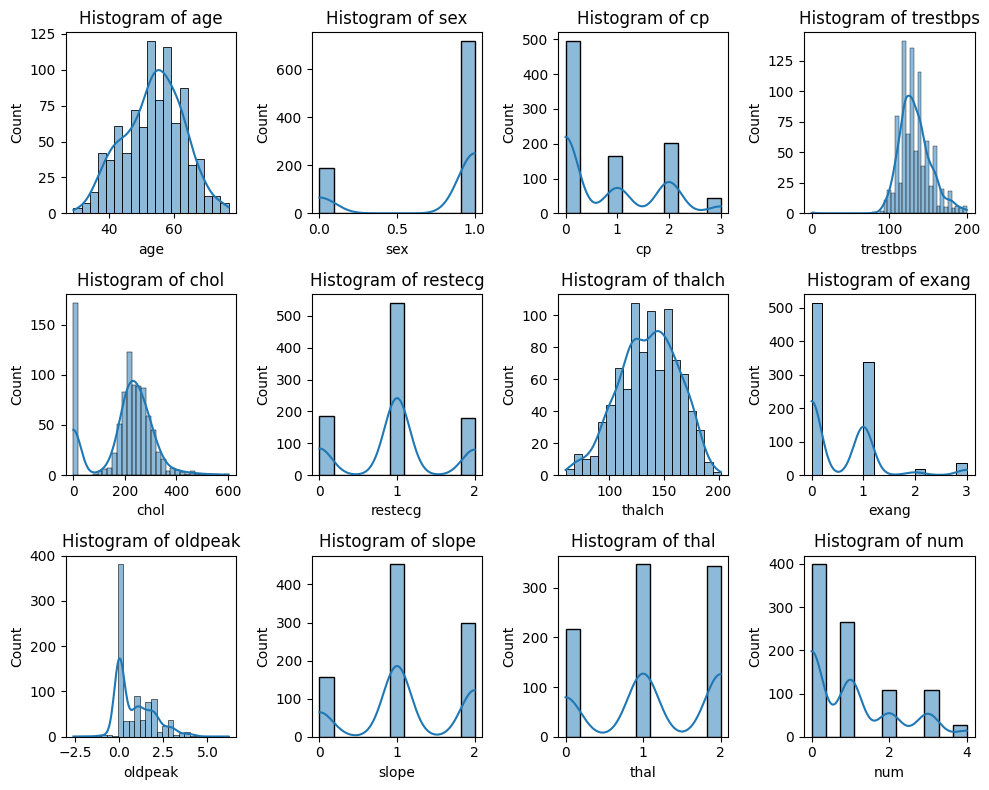

In [212]:
plt.figure(figsize=(10, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

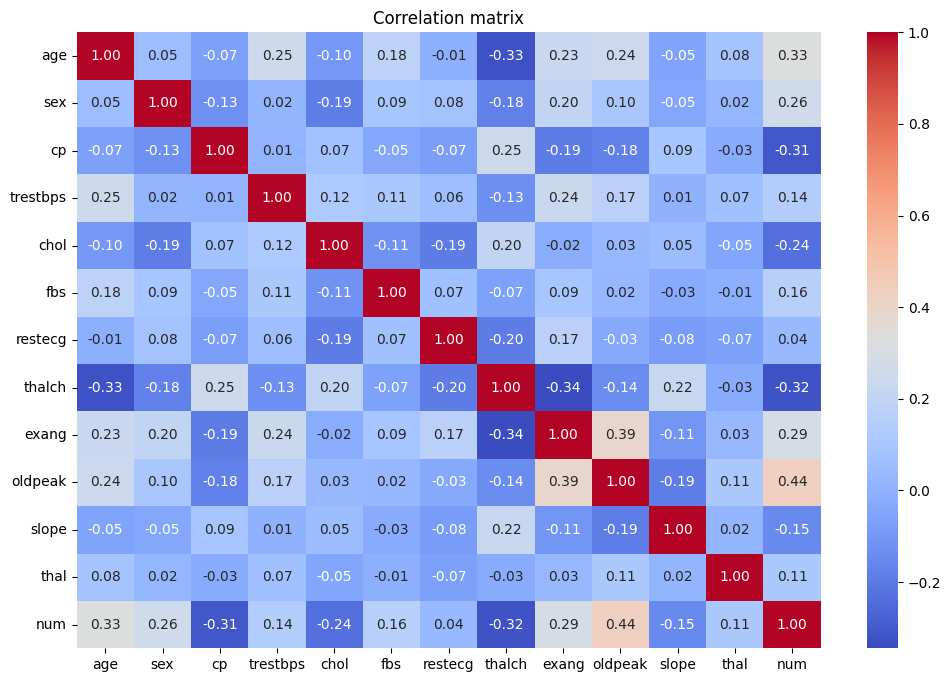

In [213]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix')
plt.show()

In [214]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [215]:
for col in numeric_cols:
    if df[col].isnull().any():
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)


/tmp/ipython-input-3956661460.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


In [216]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,True,0,150,0,2.3,0,0,0
1,41,1,1,135,203,False,1,132,0,0.0,1,0,0
2,57,1,0,140,192,False,1,148,0,0.4,1,0,0
3,52,1,3,118,186,False,0,190,0,0.0,1,0,0
4,57,1,0,110,201,False,1,126,1,1.5,1,0,0


In [217]:
features = df.drop(columns=['num'], errors='ignore')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [218]:
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)

In [219]:
df_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,1.006027,0.514416,2.320276,0.567394,0.281297,1.976894,-1.561352,0.524183,-0.731560,1.354403,-1.672770,-1.473679
1,-1.397560,0.514416,0.232258,0.076967,0.013526,-0.505844,0.013879,-0.147705,-0.731560,-0.815718,-0.224843,-1.473679
2,0.350503,0.514416,-0.811752,0.322181,-0.084656,-0.505844,0.013879,0.449529,-0.731560,-0.438305,-0.224843,-1.473679
3,-0.195767,0.514416,2.320276,-0.756760,-0.138211,-0.505844,-1.561352,2.017268,-0.731560,-0.815718,-0.224843,-1.473679
4,0.350503,0.514416,-0.811752,-1.149102,-0.004325,-0.505844,0.013879,-0.371668,0.643713,0.599578,-0.224843,-1.473679


In [220]:
if 'num' in df.columns:
    df_scaled['num'] = df['num']

In [221]:
X = df_scaled.drop(columns=['num'])
y = df_scaled['num']

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [223]:
X_train.shape

(726, 12)

In [224]:
X_test.shape

(182, 12)

In [225]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [226]:
predictions = model.predict(X_test)
probs = model.predict_proba(X_test)[:,1]



In [227]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.500


In [228]:
precision = precision_score(y_test, predictions,average='macro')
print(f"Precision: {precision:.3f}")

Precision: 0.307


In [229]:
recall = recall_score(y_test, predictions,average='macro')
print(f"Recall: {recall:.3f}")

Recall: 0.313


In [230]:
f1 = f1_score(y_test, predictions,average='macro')
print(f"F1 Score: {f1:.3f}")

F1 Score: 0.309


In [231]:
probs = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, probs, multi_class='ovr')
print(f"ROC-AUC: {roc_auc:.3f}")

ROC-AUC: 0.587


In [232]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}

In [233]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)


In [234]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy', verbose=1)

In [235]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.3f}".format(grid_search.best_score_))

Best parameters found:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Best cross-validation accuracy: 0.541


In [236]:
best_model = grid_search.best_estimator_
print(best_model)

DecisionTreeClassifier(max_depth=3, random_state=42)


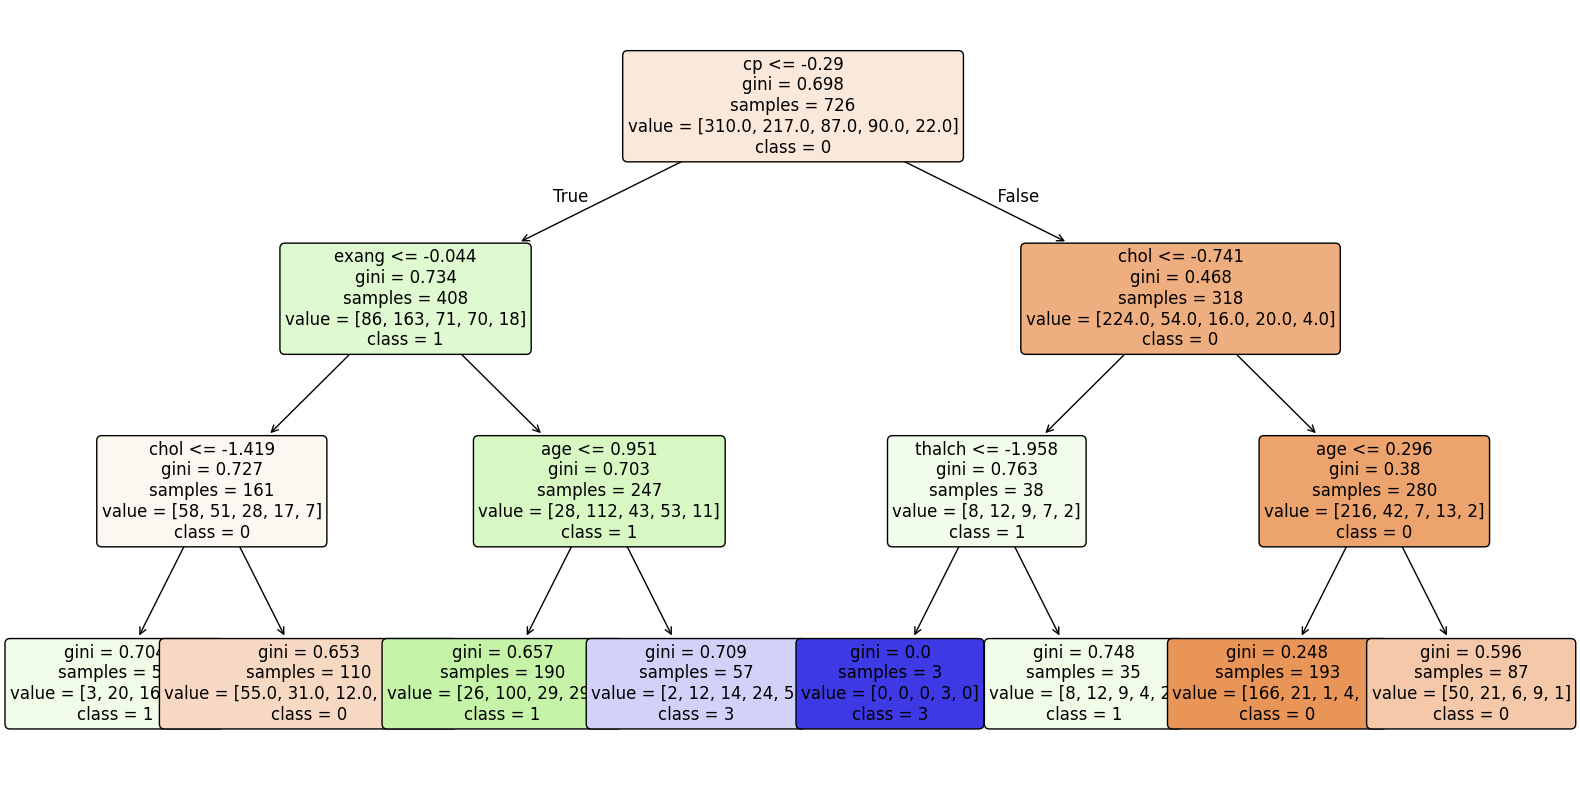

age: 0.1401
sex: 0.0000
cp: 0.5381
trestbps: 0.0000
chol: 0.2128
fbs: 0.0000
restecg: 0.0000
thalch: 0.0262
exang: 0.0828
oldpeak: 0.0000
slope: 0.0000
thal: 0.0000


In [237]:
plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=X_train.columns, class_names=[str(c) for c in best_model.classes_], filled=True, rounded=True, fontsize=12)
plt.show()

importances = best_model.feature_importances_
for feature, importance in zip(X_train.columns, importances):
    print(f"{feature}: {importance:.4f}")

In [238]:
'''
Analyzing Decision Tree Model Performance:-

 1)Accuracy tells you how many predictions were correct overall, useful as a general measure.
 2)Precision reflects how many predicted positives were actually positive, important if false positives are costly.
 3)Recall indicates how many actual positives were caught, important when missing positives is risky.
 4)F1 Score balances precision and recall, giving a single metric for overall quality.
 5)ROC-AUC measures ranking quality across all classification thresholds, showing how well the model separates classes.'''

'\nAnalyzing Decision Tree Model Performance:-\n\n 1)Accuracy tells you how many predictions were correct overall, useful as a general measure.\n 2)Precision reflects how many predicted positives were actually positive, important if false positives are costly.\n 3)Recall indicates how many actual positives were caught, important when missing positives is risky.\n 4)F1 Score balances precision and recall, giving a single metric for overall quality.\n 5)ROC-AUC measures ranking quality across all classification thresholds, showing how well the model separates classes.'

1>IMPORTANT FEATURES ARE:-

The most important features influencing the decision tree model's prediction of heart disease are cholesterol level, age, maximum heart rate achieved, chest pain type, and resting blood pressure.




#                 INTERVIEW QUESTIONS

 2>COMMON HYPERPARAMETRS OF DECISION TREE MODEL ARE:-

 max_depth: Controls how deep the tree can grow. A smaller depth keeps the model simple and generalizes better, but if too shallow it might miss important patterns. A very deep tree can overfit the training data and perform poorly on new data.

 min_samples_split: The minimum number of samples needed to split a node. Larger values make the tree more conservative and reduce overfitting by requiring more samples to split, while smaller values allow the tree to capture more detail but may overfit.

 min_samples_leaf: Minimum number of samples required to be at a leaf node. Setting this higher can smooth the model predictions and prevent overfitting.

3>DIFFERENCE BETWEEN LABEL ENCODING AND ONE_HOT ENCODING
# **Label Encoding:**

 Converts each category in a categorical feature into a unique integer label.

 Simple and uses only one column.

 Good for ordinal data where categories have an order (like Low=1, Medium=2, High=3).

 Can mistakenly imply an order for nominal categories (like 'red', 'blue', 'green'), which might mislead models.

# **One-Hot Encoding:**

 Creates separate binary (0/1) columns for each unique category.

 Avoids implying any order.

 Suitable for nominal categorical variables.

 Can increase dimensionality if a feature has many categories.

